Centroid picture

In [4]:
# import make_blobs from sklearn
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.datasets import make_blobs

# import matplotlib
import matplotlib.pyplot as plt

# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

In [2]:
# generate clusters 
# y is a label and not part of the x,y axis
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.5,
                  random_state=0)

## k-means Clustering

The first thing we need to do before fitting the data is to instantiate the KMeans class from Sklearn by the following code:

In [6]:
plt.style.use('dark_background')

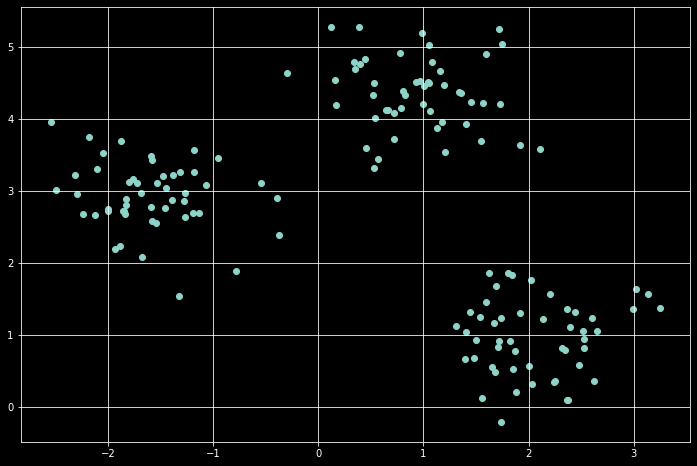

In [8]:
# set figure size
plt.rcParams["figure.figsize"] = (12,8)

# plot clusters
# https://stackoverflow.com/questions/17882205/list-slicing-python-what-does-it-mean
plt.scatter(X[:,0], # using slices
            X[:,1],
            marker='o')
plt.grid()
plt.show()

In [20]:
X[0]

array([2.60509732, 1.22529553])

In [10]:
#We can easily see the clusters visually but we want the computer to do it himself

In [11]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans
km = KMeans(n_clusters=3, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [12]:
# fit and predict
y_km = km.fit_predict(X)

array([1, 2, 2, 2, 1, 2, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0, 0, 1, 0, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 2, 2, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 2, 0, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 1, 1], dtype=int32)

array([[0.5323772 , 3.31338909]])

In [13]:
 def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        # y_res 
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

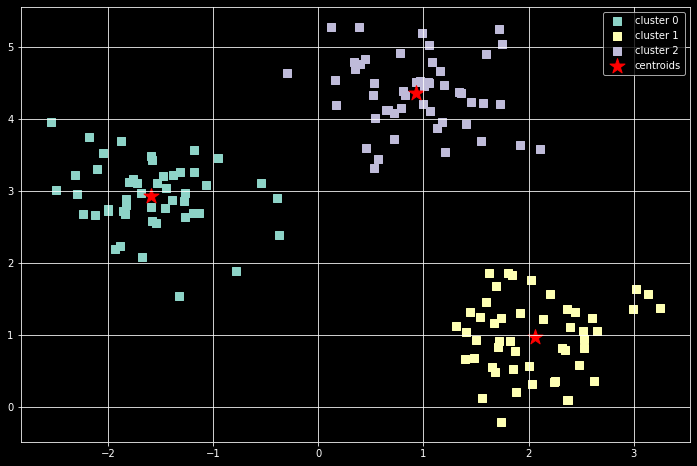

In [14]:
# plot clustering result
plot_clusters(X, y_km, plt_cluster_centers= True)


## Elbow Rule (Super IMPORTANT)

In the previous example, we set the number of clusters to three because we knew this number from the data generation process. In a real-world application, we usually don't know the number of clusters before modeling. 

In [16]:
def plot_distortion(X,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)
    # graph plot(x:k number, y = inertia)
    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 


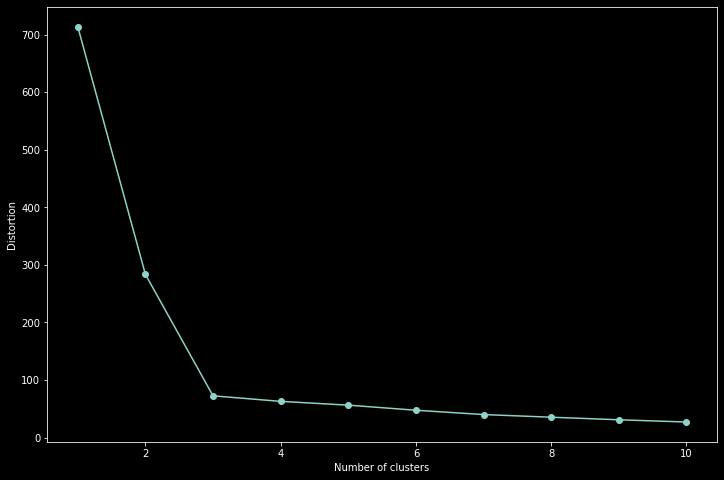

In [17]:
# elbow rule
plot_distortion(X,max_clusters=10)